# Report Statistical Foundations of Machine Learning

- Khalil Oauld Chaib  0557031  Master of Applied Informatics: Artificial Intelligence
- Mohammed Shabot     0563065  Master of Science in Applied Sciences and Engineering: Computer Science: Artificial Intelligence
- Ferit Fikri Murad   0620940  Master of Applied Informatics: Artificial Intelligence

In [15]:
#When first interacting with the notebook, remove the '#' below, to install all the necessary packages
#pip install pandas scikit-learn matplotlib seaborn



⡿ installing pandasenvironmentNote: Dependent package 'numpy' contains 1 apps
  - f2py

No apps associated with package pandas. Try again with '--include-deps' to
include apps of dependent packages, which are listed above. If you are
attempting to install a library, pipx should not be used. Consider using pip
or a similar tool instead.


In [3]:
from Dataset.pre_processing import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from nn import datasplitter
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns



In this project for the course: 'Statistical Foundations of Machine Learning', we are expected to explore and address three fundamental research questions. We have to address these research questions in the form of an interactive report, combining textual explanations, visualizations and executable Python code to provide a comprehensive understanding of the research undertaken. These are the three research questions we chose:

1. Which features have the highest impact on predicting obesity or CVD risk?
2. What is the effect of hyperparameter choices, such as learning rate, batch size, or number of hidden units, on the performance of machine learning algorithms?
3. What is the impact of mislabeling on the performance of machine learning models?

To address these research questions, we utilized two Machine learning models: Random forests and Neural Networks. Both these machine learning models will be explained in the next chapters. Thereafter, we will briefly discuss the pre processing phase. Lastly, we discuss the thorough experimentation and discuss the results in the last chapter.


## Research
### Random forests
Random forests is an ensemble learning method, which, as the name suggests, is based on constructing multiple decision trees. Random forests can be used for both classification and regression tasks. In the case of classification, the result of the random forest depends on the class that is returned by the majority of the trees. For regression, the result of the random forest is the mean of the outputs from all the trees. Decision trees are known to overfit, especially when noisy data is added, but random forests mitigate this problem by averaging the results of multiple trees, thus enhancing robustness and generalizability.

As mentioned above, random forests is an ensemble learning method. The model uses __bagging__ (Bootstrap Aggregating) to increase the performance and robustness. Bagging is a method that combines multiple models to decrease variance and increase accuracy, where the model on itself might lack this. On a high level, the process of random forests consists out of 3 steps.

1. __Bootstrap Samples__:
   The dataset is split up into multiple subsets (bootstrap samples) by means of random sampling with replacement. This means that each         dataset has the same amount of samples, however, some observations might be selected multiple times, while other observations might not      be selected at all.
2. __Model training__:
   Each individual model will be trained on each bootstrap sample. In case of random forest, these models are decision trees. This results      in each model being trained on a slightly different dataset, thus resulting in slightly different decision trees.
3. __Aggregating__:
   For classification problems, the random forest determines the final result by selecting the class predicted by the majority of the trees     (majority voting). For regression problems, the final prediction is the average of the predictions from all the trees.

Lets delve into some mathematics. 
Given a dataset D with N samples, bootstrap sampling will create B different subsets D<sub>1</sub>, D<sub>2</sub>, ..., D<sub>B</sub>, each of size N, by sampling from D with replacement. The probability of any given sample being included in a single bootstrap is equal to the following formula (Efron & Tibshirani, 1993):

$$P(x_i \in D_j) = 1 - \left(1 - \frac{1}{N}\right)^N$$

Each decision tree T<sub>i</sub> in the forest is trained on a bootstrap sample D<sub>i</sub>. At each point where the tree splits, only a random selection of  m  features out of the total  p  features is considered to find the best split. This added randomness makes the trees less similar to each other, which helps to make the overall model stronger and more reliable.

Lastly, after all the individual trees have been trained on the bootstrap samples, we have to aggregate the predictions.

__Classification__: When a new input is given to the random forest, each tree in the forest will make its own prediction T<sub>i</sub>(x).
                    The final prediction is determined by a majority vote, which looks as follows: $$\hat{y} = \text{mode}(T_1(x), T_2(x), \ldots, T_B(x))$$

__Regression__: When a new input is given to the random forest, each tree provides its own prediction T<sub>i</sub>(x). The final prediction $$\hat{y}$$ will be determined be the following formula: $$\hat{y} = \frac{1}{B} \sum_{i=1}^{B} T_i(x)$$




### Neural Networks


Neural networks are a class of machine learning models that are inspired by the human brain's structure and function, in that sense that they are designed to recognize complex structures and patterns in data through a series of interconnected nodes, called neurons, which are organized into layers. Their applications are enormous, they range from classification and regression, to image and speech recognition.

### High level overview of neural networks
A neural network typically consists of 3 types of layers, namely: The input layer, the hidden layer and the output layer. The training of a neural network can be summarized into the following steps (high level):

1. The weights of the connections between the neurons are initialized; In our case, scikit-learn's MLPClassifier handles this initialization.
2. Before training, you have to make sure that your non-numerical columns are encoded, and that the features are standardized. We achieved this by using LabelEncoder and StandardScaler.
3. __Forward Propagation__: Data from the input layer is passed through the network, where each neuron will apply a transformation to the input. This continues through each layer, until the data reaches the third layer (output layer), and the predictions are made.
4. __Loss Calculation__: After the predictions are made, they are compared to the actual target values using a loss function. The loss function measures the distance between the predicted values and the true values. The MLPClassifier, which is in our case, uses the cross-entropy loss function for classification tasks.
5. __Backward Propagation__: Subsequently, the network will adjust its weight, so that the loss is minimzed. This is done through a backpropagation algorithm, which calculates the gradient of the loss function with respect to each weight and updates the weights accordingly using an optimization method like gradient descent.
6. __Iteration__: Steps 2 - 4 are repeated for many iterations, which are called epochs, until the network's performance stabilizes and loss is minimzed.

A key aspect to consider when training neural networks is the activation functions. Each neuron in the network receives input from all the neurons in the previous layer, and an activation function is applied to all these inputs. The activation function will determine whether the neuron is activated (passes a significant signal) or not (outputs zero). In our grid search algorithm (which will be mentioned later on in this notebook), we consider two activation functions:

- __ReLU__ (Rectified Linear Unit):
  The ReLU activation function is defined as follows: $$ \text{ReLU}(z) = \max(0, z) $$
  where z is the weighted sum of the neurons from the previous layer, which is defined as follows: $$ z = \sum_{i} w_i x_i + b $$
  The ReLU activation function helps in mitigating the vanishing gradient problem, making it easier to train deep networks. It is   computationally efficient and helps the network to converge faster.
- __Tanh__ (hyperbolic tangent):
  The tanh activation function is defined as follows:
  $$ \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} $$
  where z, in the same fashion as above, is the weighted sum of the neurons from the previous layer, which is defined as follows:
  $$ z = \sum_{i} w_i x_i + b $$
  The tanh activation function outputs values between -1 and 1, making it centered around zero, which can be useful during training. It is   often used in hidden layers to provide a smooth gradient and better convergence properties.

Another key aspect to consider is gradient-based optimization. After backpropagation, where all the gradients are computed, the weights are then adjusted accordingly using a gradient-based optimization method. For our experiments, we chose to work with Stochastic Gradient Descent (SGD) and Adaptive Moment Estimation.

__SGD__: Stochastic Gradient Descent is, as mentioned above, an optimization method to minimize the loss function by updating the weights iteratively. The weights are updated as follows: $$ w_{t+1} = w_t - \eta \nabla L(w_t) $$

where:
- w<sub>t</sub> is the weight vector at iteration
- $\eta$ is the learning rate
- $\nabla$ L(w_t) is the gradient of the loss function L with respect to  w  at iteration t

    
__Adam__:   Adam is an optimization algorithm that combines the benefits of both the AdaGrad and RMSProp algorithms to minimize the loss function by updating the weights iteratively. The weights are updated using the following equations (Kingma & Ba, 2014):

- $m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(w_t)$
- $v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L(w_t))^2$
- $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
- $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
- $w_{t+1} = w_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$

where:
- $w_t$ is the weight vector at iteration $t$
- $\eta$ is the learning rate
- $\nabla L(w_t)$ is the gradient of the loss function $L$ with respect to $w$ at iteration $t$
- $m_t$ and $v_t$ are the first and second moment estimates at iteration $t$
- $\beta_1$ and $\beta_2$ are the exponential decay rates for the moment estimates
- $\hat{m}_t$ and $\hat{v}_t$ are the bias-corrected moment estimates
- $\epsilon$ is a small constant to prevent division by zero


  
  

## Preprocessing

In this study, we utilized the dataset which is focused on obesity classification. It includes features concerning eating habits and physical condition.

__Eating habits__:
- FAVC: Frequenct consumtion of high caloric food
- FCVC: Frequency of consumption of vegetables
- NCP: Number of main meals
- CAEC: Consumption of good between meals
- CH20: Consumption of water daily
- CALC: Consumption of alcohol

__Physical condition__:

- SCC: Calories consumption monitrong
- FAF: Physical activity frequency
- TUE: Time using technology devices
- MTRANS: Transportation used

Other variables that are obtained are: Gender, Age, Height and Weight. Lastly, there are 6 obesity types, which are the target values:
•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

All this data, can be found on https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data.

We have decided to use a neural network for the classification tasks and a random forest for the regression tasks

In [4]:
dataset = pd.read_csv('./Dataset/ObesityDataSet.csv')
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


After choosing the dataset, we noticed that the data was already very clean from the start, so we did not have to do much preprocessing up front. We also noticed that the dataset contains a lot of strings. The first thing we did was convert these strings into numerical variables, so that we are able to feed them into the models. The 'pandas' library has a built-in method to do that.

In [5]:
def make_categorical(data):
    # Convert categorical variables to numerical variables
    data['Gender'] = pd.Categorical(data['Gender']).codes
    data['family_history_with_overweight'] = pd.Categorical(data['family_history_with_overweight']).codes
    data['FAVC'] = pd.Categorical(data['FAVC']).codes
    data['CAEC'] = pd.Categorical(data['CAEC']).codes
    data['SMOKE'] = pd.Categorical(data['SMOKE']).codes
    data['SCC'] = pd.Categorical(data['SCC']).codes
    data['CALC'] = pd.Categorical(data['CALC']).codes
    data['MTRANS'] = pd.Categorical(data['MTRANS']).codes
    data['NObeyesdad'] = pd.Categorical(data['NObeyesdad']).codes

    return data

Thereafter, we had to prepare the dataset to be fed into the models. For the classificaiton task, We decided to drop the 'Weight' column, since weight has a very strong correlation with obesity (shown in the correlation matrix below). We then removed the target value row from the dataset and split the dataset into training, testing and validation sets in the following ratios:
- Training set: 80%
- Validation set: 10%
- Test set: 10%

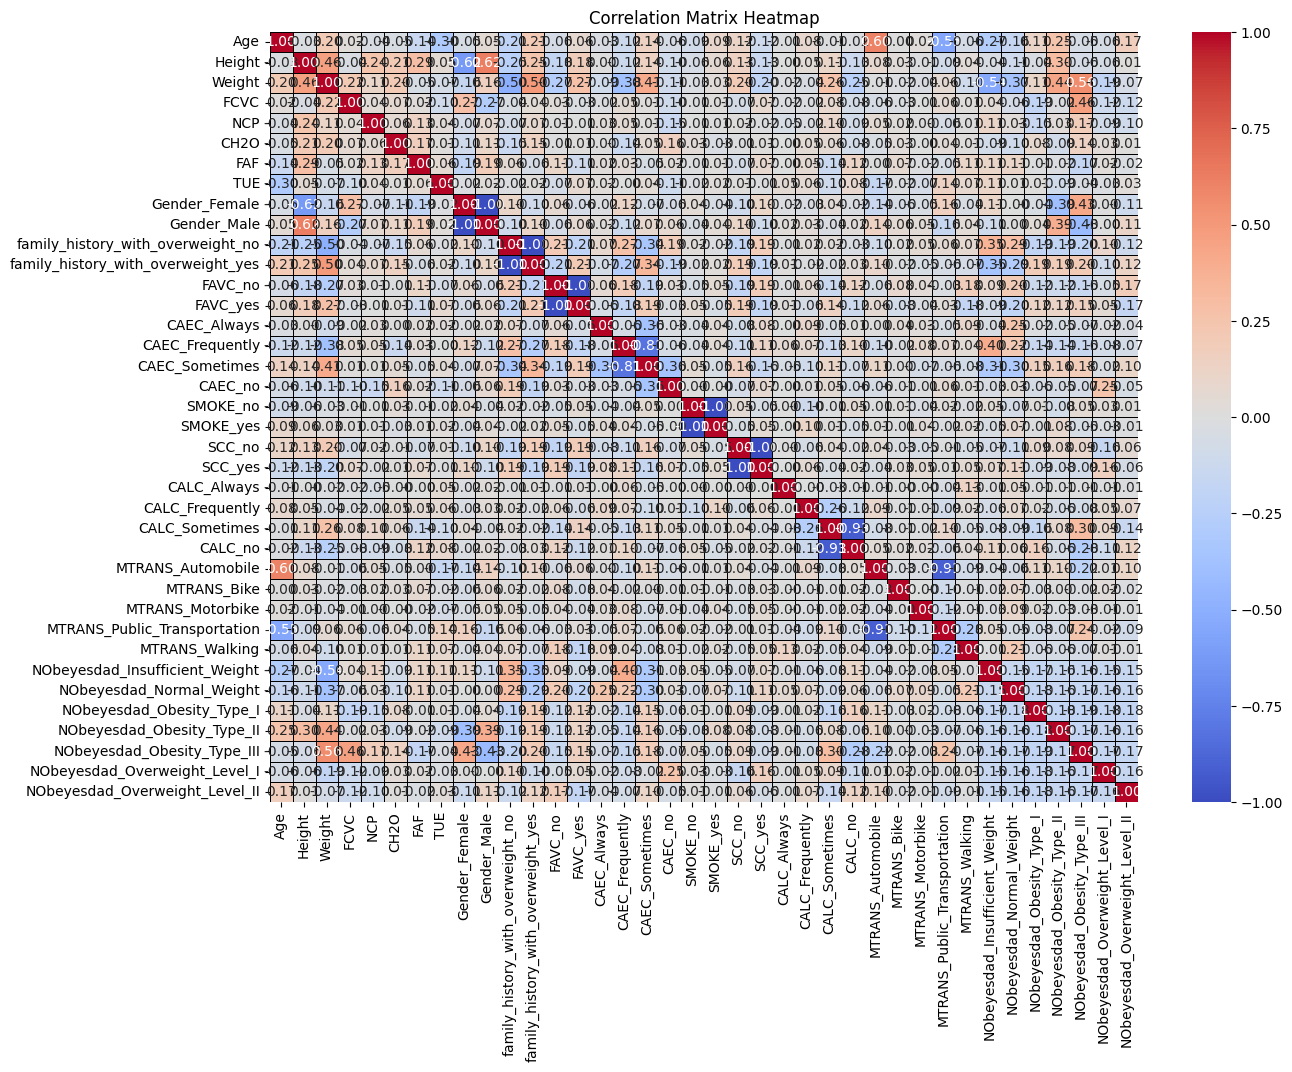

In [6]:
data = pd.get_dummies(dataset)

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
def pre_processing_classification(path):

    data = pd.read_csv(path)

    #print(data.shape)
    data = make_categorical(data)
    

    # Split the dataset into input features and the target variable
    X = data.drop('NObeyesdad', axis=1)
    X = X.drop('Weight', axis=1)
    Y = data['NObeyesdad']

    
    # Split the dataset into training and testing sets
    X_train, X_rest, y_train, y_rest = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

For the regression task, we decided to use the 'Weight' as target value, so we removed the obesity for the same reason as mentioned above. In the same fashion, we removed the 'Weigt' column from the dataset and used it as target value column.

In [8]:
def pre_processing_regression(path):

    data = pd.read_csv(path)

    data = make_categorical(data)

    X = data.drop('NObeyesdad', axis=1)
    X = X.drop('Weight', axis=1)

    Y = data['Weight']

    X_train, X_rest, y_train, y_rest = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test   

Then, since we visualized the distribution of the obesity levels for the classification task. The distribution is shown below.

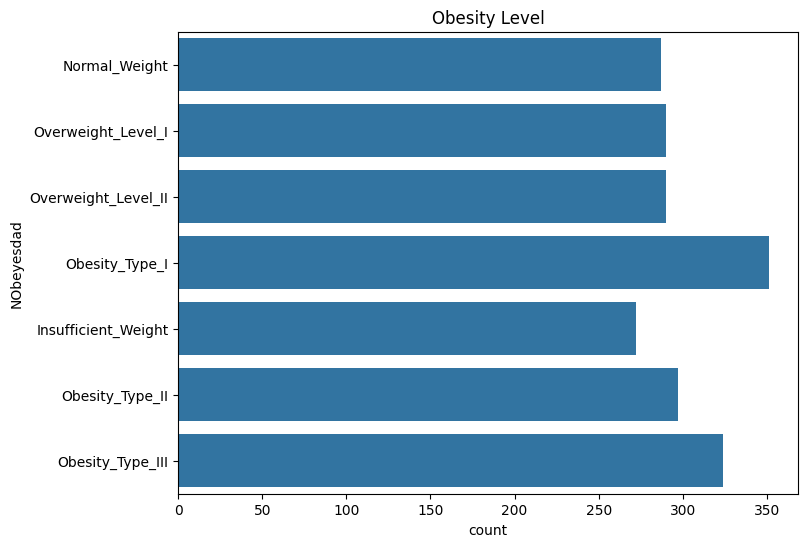

In [9]:
# Obesity Level (NObeyesdad)
plt.figure(figsize=(8, 6))
sns.countplot(dataset['NObeyesdad'])
plt.title('Obesity Level')
plt.show()

The countplot above shows that the target value is pretty balanced. Then, we also visualised the distribution of the weight class, since we are using this for the regression task. This visualisation is shown below.

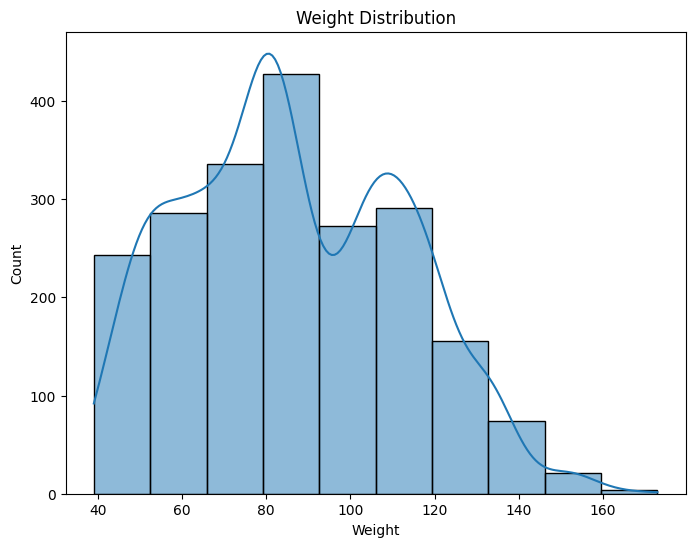

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Weight'], bins=10, kde=True)
plt.title('Weight Distribution')
plt.show()

We have done many more visualisations, just to get a feel of what the dataset looks like. All of these visualisations are shown in stat.ipynb, which is also an interactive jupyter notebook file. All the other classes are mostly imbalanced.

## Experimentation
### Vlaamse super computer
For the second research question, which concerns the effect of hyperparameter choices, we decided to use grid search to iterate over a set of hyperparameters. However, since this operation is very computationally expensive, we were not able to run this on our own devices. The solution for our problem was the 'Vlaamse Super Computer' (vsc). We would like to extend our thanks to the VSC team for granting us access and providing assistance whenever needed.

Subsequently, after receiving access and transferring our files to the server, we were able to fluently run grid_search, for both the neural network and for the random forest. This step was crucial to answer the second research question.


## Research questions

### Which features have the highest impact on predicting obesity or CVD risk?


### What is the effect of hyperparameter choices, such as learning rate, batch size, or number of hidden units, on the performance of machine learning algorithms?

### What is the impact of mislabeling on the performance of machine learning models?

Dataset/ObesityDataSet.csv
original results: {'accuracy': 0.7943262411347518, 'f1': 0.7900636897864829, 'precision': 0.790031632377127, 'recall': 0.7943262411347518}
Dataset/Mislabeled_class_more/Dataset_mislabeled__class_1%.csv
mislabeled_1 results: {'accuracy': 0.7801418439716312, 'f1': 0.7756999336712893, 'precision': 0.777018374938257, 'recall': 0.7801418439716312}
Dataset/Mislabeled_class_more/Dataset_mislabeled__class_2%.csv
mislabeled_2 results: {'accuracy': 0.7777777777777778, 'f1': 0.7731903107275374, 'precision': 0.7738375138632273, 'recall': 0.7777777777777778}
Dataset/Mislabeled_class_more/Dataset_mislabeled__class_5%.csv
mislabeled_5 results: {'accuracy': 0.735224586288416, 'f1': 0.7397819384955346, 'precision': 0.7531627438395924, 'recall': 0.735224586288416}
Dataset/Mislabeled_class_more/Dataset_mislabeled__class_7%.csv
mislabeled_7 results: {'accuracy': 0.6784869976359338, 'f1': 0.673791564803245, 'precision': 0.675182215123328, 'recall': 0.6784869976359338}
Dataset/Mis

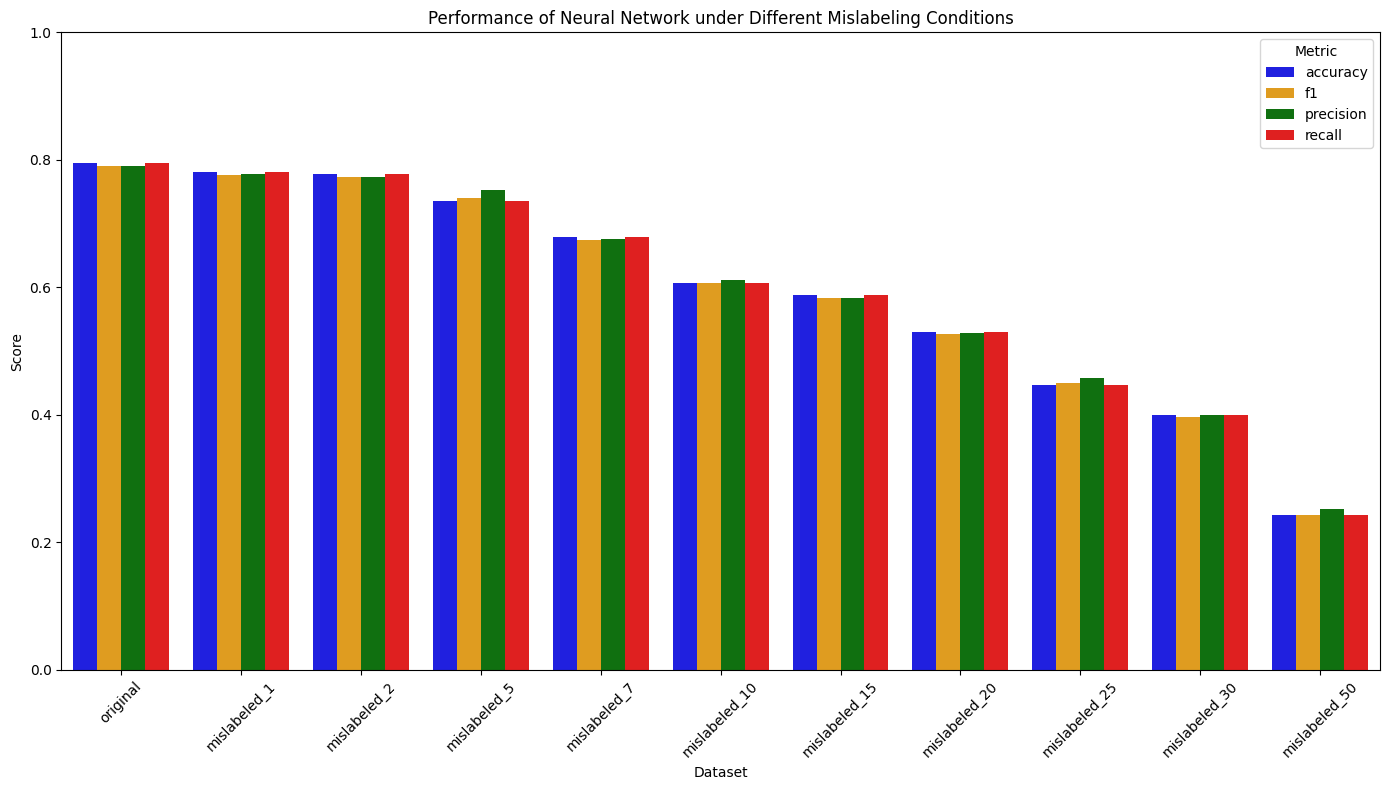

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# The most optimal parameters, which resulted from grid_search
hidden_layer_sizes = (64, 128)
activation = 'tanh'
batch_size = 32
learning_rate = 'adaptive'
learning_rate_init = 0.01
solver = 'adam'

def datasplitter(file_path):
    print(file_path)
    data = pd.read_csv(file_path)

    # Encode non numerical columns
    label_encoder = LabelEncoder()
    encoded_columns = data.select_dtypes(include=['object']).columns
    for column in encoded_columns:
        data[column] = label_encoder.fit_transform(data[column])
    
    features = data.drop(columns=['NObeyesdad', 'Weight']).columns.tolist()

    X = data[features]
    y = data['NObeyesdad']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def plot_loss(history):
    plt.plot(history.loss_curve_, label='Training Loss')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to train and evaluate model
def train_and_evaluate_model(file_path):
    X_train, X_test, y_train, y_test = datasplitter(file_path)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the model
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                          max_iter=500, 
                          learning_rate=learning_rate, 
                          learning_rate_init=learning_rate_init, 
                          activation=activation, 
                          solver=solver, 
                          batch_size=batch_size, 
                          random_state=42)

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted')
    }
    
    return metrics, model, X_test, y_test, y_pred

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis')
    plt.title(title)
    plt.show()

# Function to plot class-specific metrics
def plot_class_metrics(y_test, y_pred, title):
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'])
    
    plt.figure(figsize=(12, 6))
    df[['precision', 'recall', 'f1-score']].plot(kind='bar')
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Datasets
datasets = {
        'original': "Dataset/ObesityDataSet.csv",
        'mislabeled_1': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_1%.csv",
        'mislabeled_2': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_2%.csv",
        'mislabeled_5': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_5%.csv",
        'mislabeled_7': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_7%.csv",
        'mislabeled_10': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_10%.csv",
        'mislabeled_15': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_15%.csv",
        'mislabeled_20': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_20%.csv",
        'mislabeled_25': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_25%.csv",
        'mislabeled_30': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_30%.csv",
        'mislabeled_50': "Dataset/Mislabeled_class_more/Dataset_mislabeled__class_50%.csv"
    }


# Store results
results_nn = {}

# Train and evaluate model on each dataset
for name, dataset in datasets.items():
    metrics, model, X_test, y_test, y_pred = train_and_evaluate_model(dataset)
    results_nn[name] = metrics
    print(f'{name} results: {metrics}')

# Function to plot overall results using seaborn
def plot_results(results, title):
    df = pd.DataFrame(results).T
    df = df.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
    
    # Define a custom color palette
    custom_palette = {
        'accuracy': 'blue',
        'f1': 'orange',
        'precision': 'green',
        'recall': 'red'
    }
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='index', y='score', hue='metric', data=df, palette=custom_palette)
    plt.title(title)
    plt.xlabel('Dataset')
    plt.ylabel('Score')
    plt.legend(title='Metric', loc='upper right')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot overall results
plot_results(results_nn, 'Performance of Neural Network under Different Mislabeling Conditions')

We decided to define noise levels as 5%, 10%, 15% and 20%, 25%, 30% and 50%. For each noise level, there are 4 important metrics to consider when studying the effect of mislabeling on a neural network. In this paragraph, we go over each metric and explain their importance. The metrics are:

- __Accuracy__: The accuracy is the ratio of the correct predictions to the total amount of predictions, and is thus defined as follows:
  $ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $

- __Recall__: The recall is defined as the ratio of correctly predicted positive instances to all instances that are actually positive. It measures the model's ability to identify positive instances correctly, and is defined as follows:
$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

- __Precision__: The precision is defined as the ratio of the correctly predicted instances to the total predicted positive instances, and is defined as follows:
$  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}  $

- __F1__: The F1 score is the harmonic mean of precision and recall. It defines a trade-off between precision and recall. It is defined by the following formula:
$  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $


In the case of measuring the effect of mislabeling on a neural network, it is important to look at the F1 score, since mislabeling target values has effect on both recall and precision and the F1 score balances these two metrics. As is clearly seen, the F1 score decreases as the percentage of mislabeled target values decreases. 

original results: {'mse': 61.90963245030959, 'r2': 0.9121987341712336}
mislabeled_1 results: {'mse': 62.422180663098025, 'r2': 0.9119521008594262}
mislabeled_2 results: {'mse': 70.41063012995652, 'r2': 0.9012751592995115}
mislabeled_5 results: {'mse': 78.17483543594179, 'r2': 0.887555374633235}
mislabeled_7 results: {'mse': 116.39556594335099, 'r2': 0.849950142830382}
mislabeled_10 results: {'mse': 138.6737451642652, 'r2': 0.8174293433908285}
mislabeled_15 results: {'mse': 250.6765964755561, 'r2': 0.7143577062817381}
mislabeled_20 results: {'mse': 380.8632934625641, 'r2': 0.600015212200697}
mislabeled_25 results: {'mse': 601.12782950177, 'r2': 0.4856860498083546}
mislabeled_30 results: {'mse': 789.7180285609625, 'r2': 0.4347085356367577}
mislabeled_50 results: {'mse': 2199.2004033380845, 'r2': 0.1737837454257134}


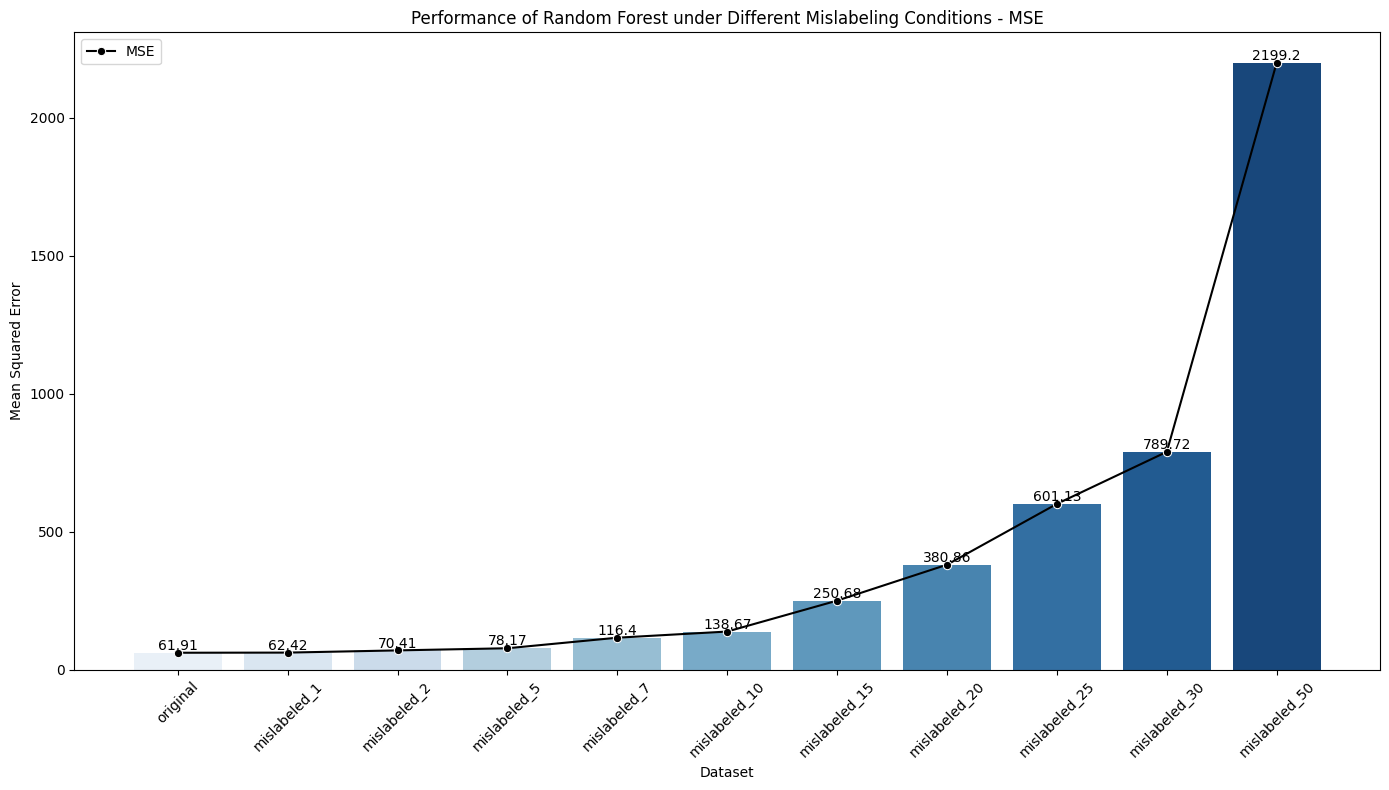

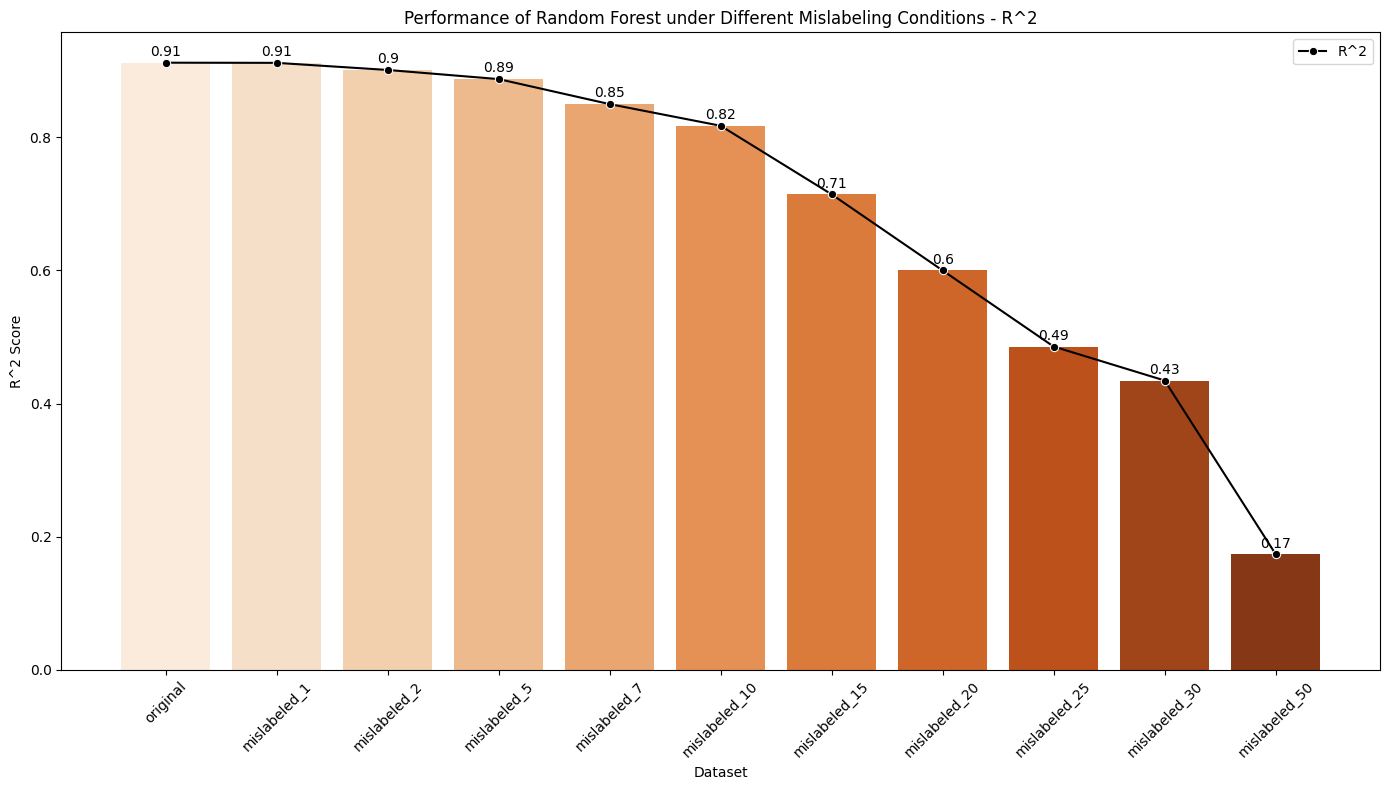

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to split and preprocess the data
def datasplitter(file_path): 
    data = pd.read_csv(file_path)
    
    # Encode non-numeric columns
    label_encoder = LabelEncoder()
    encoded_columns = data.select_dtypes(include=['object']).columns
    for column in encoded_columns:
        data[column] = label_encoder.fit_transform(data[column])
    
    features = data.drop(columns=['NObeyesdad', 'Weight']).columns.tolist()
    X = data[features]
    y = data['Weight']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Function to train and evaluate the model
def train_and_evaluate_model(file_path):
    X_train, X_test, y_train, y_test = datasplitter(file_path)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the model with the most optimal parameters, according to grid search
    regressor = RandomForestRegressor(n_estimators=90, 
                                      max_depth=30, 
                                      min_samples_split=8,
                                      min_samples_leaf=1, 
                                      max_features='sqrt', 
                                      bootstrap=False,
                                      random_state=42)

    # Fit the model
    regressor.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'mse': mse, 'r2': r2}

# Function to plot the results
def plot_results(results, title):
    df = pd.DataFrame(results).T
    df.reset_index(inplace=True)
    order = df['index']
    
    # Plot for MSE
    plt.figure(figsize=(14, 8))
    sns.barplot(x='index', y='mse', data=df, palette="Blues", dodge=False, order=order, hue='index')
    sns.lineplot(x='index', y='mse', data=df, marker='o', color='black', label='MSE')
    for i in range(df.shape[0]):
        plt.text(i, df['mse'][i] + 10, round(df['mse'][i], 2), ha='center')
    plt.title(f'{title} - MSE')
    plt.xlabel('Dataset')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for R^2
    plt.figure(figsize=(14, 8))
    sns.barplot(x='index', y='r2', data=df, palette="Oranges", dodge=False, order=order, hue='index')
    sns.lineplot(x='index', y='r2', data=df, marker='o', color='black', label='R^2')
    for i in range(df.shape[0]):
        plt.text(i, df['r2'][i] + 0.01, round(df['r2'][i], 2), ha='center')
    plt.title(f'{title} - R^2')
    plt.xlabel('Dataset')
    plt.ylabel('R^2 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    datasets = {
        'original': "Dataset/ObesityDataSet.csv",
        'mislabeled_1': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_1percent.csv",
        'mislabeled_2': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_2percent.csv",
        'mislabeled_5': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_5percent.csv",
        'mislabeled_7': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_7percent.csv",
        'mislabeled_10': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_10percent.csv",
        'mislabeled_15': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_15percent.csv",
        'mislabeled_20': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_20percent.csv",
        'mislabeled_25': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_25percent.csv",
        'mislabeled_30': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_30percent.csv",
        'mislabeled_50': "Dataset/Mislabeled_reg_more/Dataset_weight_noisy_50percent.csv"
    }

    results_rf = {}

    for name, dataset in datasets.items():
        metrics = train_and_evaluate_model(dataset)
        results_rf[name] = metrics
        print(f'{name} results: {metrics}')

    plot_results(results_rf, 'Performance of Random Forest under Different Mislabeling Conditions')

We decided to define noise levels as 5%, 10%, 15% and 20%, 25%, 30% and 50%.. Then, for each noise level, we copied the dataset, to maintain the integrity of the original data. Subsequently, for each row in the dataset, we generated random noise using *np.random.normal()*, which produces random samples from a Gaussian distribution. The standard deviation of this nosie is the percentage of the noise level, mutliplied with the mean weight. Lastly, the generated noise is added to the 'Weight' value, therefore creating a noisy version of the dataset, with respect to the noise level.

The plots shown above display the performance of of a Random Forest under different mislabeling conditions. The datasets are mislabeled on the attribute Weight (which is the target value for the RandomForestRegressor). As we expected, when the percentage of mislabeled values increases, the mean squared error (mse, shown in the left plot) also increased. The mean squared error is a measure used to evaluate the accuracy of the random forest. The mse is the average squared difference between the predicted value of the model and the true value. Since it (almost exponentially) increases, we can say that the accuracy of the model's predictions decreases (exponentially).

Another key aspect of evaluating the performance of the model, is the R² score, which is also known as the coefficient of determination. It is a statistical measure that indicates how well the regression predictions approximate the real data points. The R² score is defined as follows: $R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$.

__Interpretation__:
- R² = 1: The model perfectly explains all the variability of the response data around its mean.
- R² = 0: The model does not explain any of the variability of the response data around its mean.
- R² < 0: The model performs worse than the mean model, indicating poor predictions.

In the 2nd graph, the R² score decreases as the number of the mislabeled data points increases. This means that the predictive power of the RandomForestRegressor decreases as the number of mislabeled data points increases.






### Conclusion: Impact of mislabeling on the performance of ML models

The provided visualizations clearly demonstrate that mislabeling up to the 5% mark does not have a significant impact on the performance of both the neural network and the random forest regressor. However, beyond the 5% mislabeling threshold, the impact becomes significantly greater. The performance metrics of the neural network show a steady decline with increasing levels of mislabeling. It shows that even a small amount of mislabeling already has significant impact on the performance of the model.

When looking at the random forest, we observe that the mean squared error remains manageable up to the 5% mislabeling mark, but increases drastically as the percentage of mislabeled data exceeds this threshold. If we look at it from a mathematical perspective, recall that mse is defined as follows: $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$ As the error term $(y_i - \hat{y}_i)$, increases due to mislabeling, the square will make it grow exponentially as the percentage of mislabeled data increases.



We can conclude that Neural Networks are more robust to mislabeled data than random forests, and this is due to several reasons:

- Neural networks use gradient-based optimization (in this case, adam), which allows the network to be more resilient to noise as it updates the weights incrementally. This method helps to reduce both in-sample and out-of-sample errors, even when some mislabeling is present.
- In the neural network described above, we implemented regularization techniques such as dropout and early stopping. These techniques help to keep both the in-sample and out-of-sample errors relatively low, even in the presence of mislabeling. Regularization prevents the model from overfitting to the noisy training data, thus improving its generalization capability.
- As mentioned in the first paragraph, random forests are an ensemble of decision trees. This provides robustness to variance, but they are sensitive to noise. Mislabeling affects the splits in the individual trees, leading to higher in-sample error due to overfitting the noisy data. Consequently, this results in poor out-of-sample performance when aggregating the individual trees.
- Unlike NNs, random forests do not use gradient descent. Instead, they rely on recursive binary splitting. This method does not benefit from the incremental corrections provided by gradient-based optimization, making random forests more susceptible to increased out-of-sample error due to mislabeling.

RFs, while powerful, are more vulnerable to noise due to their reliance on decision tree splits and lack of iterative corrections.